# EDA and Baseline Model for Hit-Predict Project

## Table of Contents
1. [Setup](#setup)
    - [Importing Libraries](#lib)
    - [Loading Data](#data)
2. [Exploratory Data Analysis and Visualizations](#eda)
    - [Exploration of Variables](#sub1)
    - [Distribution of Target Variable - Popularity](#sub2)
    - [Dealing with the 0 values in the target variable & saving new datasets](#sub3) 
        - [Replacing them with artist popularity](#subsub1)
        - [Removing them](#subsub2)
        - [Not doing anything](#subsub3)
    - [Distribution of the other variables](#sub4)
    - [Plotting the different potential predictors against the target variable](#sub5)
    - [Clustering](#sub6)
    - [Outliers](#sub7)
3. [Baseline Model](#baseline)
    - [Linear Regression](#sub8)
    - [K-NN Regression](#sub9)

## 1. Setup
<a id="setup"></a>

### Importing Libraries
<a id="lib"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

from scipy.stats import zscore

### Loading Data
<a id="data"></a>

In [3]:
DATA_PATH = "../data/processed_spotify_songs.csv"
df = pd.read_csv(DATA_PATH)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
track_popularity,28352.0,39.335320,23.699443,0.000000,21.000000,42.000000,58.000000,100.000000
danceability,28352.0,0.463788,0.188308,0.000000,0.325701,0.464561,0.597751,1.000000
energy,28352.0,0.521398,0.238359,0.000000,0.335241,0.521284,0.710649,1.000000
key,28352.0,5.367417,3.613743,0.000000,2.000000,6.000000,9.000000,11.000000
loudness,28352.0,0.699150,0.099062,0.000000,0.645094,0.714462,0.769362,1.000000
mode,28352.0,0.565533,0.495696,0.000000,0.000000,1.000000,1.000000,1.000000
speechiness,28352.0,0.453648,0.127350,0.000000,0.354797,0.408549,0.525214,1.000000
acousticness,28352.0,0.449806,0.248615,0.000000,0.243211,0.431212,0.639532,1.000000
instrumentalness,28352.0,0.175032,0.289067,0.000000,0.000000,0.027490,0.187693,1.000000
liveness,28352.0,0.544491,0.131413,0.000000,0.453020,0.503325,0.629961,1.000000


In [5]:
df.head()

,track_artist,track_popularity,track_album_id,track_album_release_date,playlist_id,playlist_subgenre,danceability,energy,key,loudness,...,rap,latin,rock,pop,artist_track_encoded,playlist_id_encoded,track_album_id_encoded,release_year,release_month,release_day
0,Barbie's Cradle,41.0,1srJQ0njEQgd8w4XSqI4JQ,2001-01-01,37i9dQZF1DWYDQ8wBxd7xt,classic rock,0.481351,0.160801,2.0,0.588413,...,0,0,1,0,43.5,43.100000,41.0,2001,1,1
1,RIKA,15.0,1ficfUnZMaY1QkNp15Slzm,2018-01-26,0JmBB9HfrzDiZoPVRdv8ns,neo soul,0.350541,0.495616,5.0,0.715122,...,0,0,0,0,15.0,26.206186,15.0,2018,1,26
2,Steady Rollin,28.0,3z04Lb9Dsilqw68SHt6jLB,2017-11-21,3YouF0u7waJnolytf9JCXf,hard rock,0.095012,0.774400,9.0,0.768273,...,0,0,1,0,29.5,31.697917,28.0,2017,11,21
3,The.madpix.project,24.0,1Z4ANBVuhTlS6DprlP0m1q,2015-08-07,5TiiHps0hNCyQ6ijVkNZQs,electropop,0.449432,0.630436,10.0,0.736041,...,0,0,0,1,12.2,39.436364,24.0,2015,8,7
4,YOSA & TAAR,38.0,2BuYm9UcKvI0ydXs5JKwt0,2018-11-16,37i9dQZF1DXdOtZGKonFlM,dance pop,0.453533,0.702244,1.0,0.713109,...,0,0,0,1,38.0,35.673469,38.0,2018,11,16


## 2. Exploratory Data Analysis and Visualization
<a id="eda"></a>

### Exploration of Variables
<a id="sub1"></a>

**Categorical variables:** track_artist, track_album_id, track_album_release_date, playlist_id, playlist_subgenre, key, playlist_genre, pop, hip hop, metal, rock, edm, r&b, latin.

**Quantitative variables:** track_popularity, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, artist_track_encoded, playlist_id_encoded, track_album_id_encoded, release_year, release_month, release_day.

### Distribution of Target Variable (Popularity)
<a id="sub2"></a>

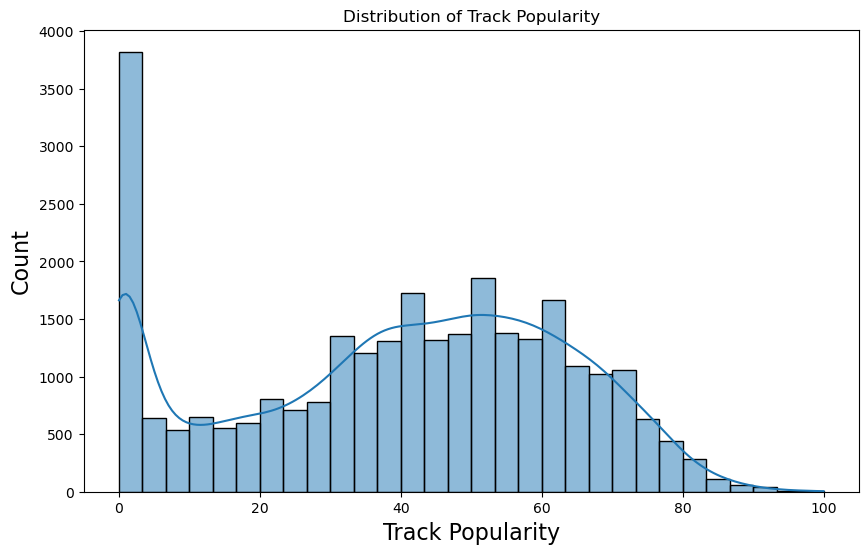

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df["track_popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.show()

### Dealing with the 0 values in the target variable (`track_popularity`)
<a id="sub3"></a>

#### a. Replacing 0 values with the artist popularity value (mean popularity of all songs in artist's discography)
<a id="subsub1"></a>

Note that where all of the artist's songs have popularity 0, the mean popularity will remain 0. 

In [7]:
df_0mean = df.copy()
before = (df_0mean['track_popularity'] == 0).sum()
print(f"number of 0 values before: {before}")

artist_popularity = df_0mean.groupby('track_artist')['track_popularity'].transform('mean')
df_0mean['track_popularity'] = df_0mean['track_popularity'].where(df_0mean['track_popularity'] != 0, artist_popularity)

after = (df_0mean['track_popularity'] == 0).sum()
print(f"number of 0 values after: {after}")

print(f"Number of tracks with 0 popularity replaced by artist popularity: {before - after}")

number of 0 values before: 2616
number of 0 values after: 870
Number of tracks with 0 popularity replaced by artist popularity: 1746


We notice that some artists have a lot of songs with popularity 0, which we can see below. This makes sense as artists can upload self-produced music to Spotify fairly easily.

In [ ]:
artists_with_zero_popularity_songs = df_0mean.groupby('track_artist').filter(lambda x: (x['track_popularity'] == 0).any())
artist_song_counts = artists_with_zero_popularity_songs['track_artist'].value_counts()
print(artist_song_counts)

track_artist
Ballin Entertainment    42
CASIOPEA                20
Lisa McClendon          11
T-SQUARE                 8
LemKuuja                 8
                        ..
Suicide Commando         1
Altafulla                1
Salif Keita              1
TV Rock                  1
Two Can                  1
Name: count, Length: 666, dtype: int64


Let's have a look again at the distribution of the target variable, i.e. the popularity of the tracks.

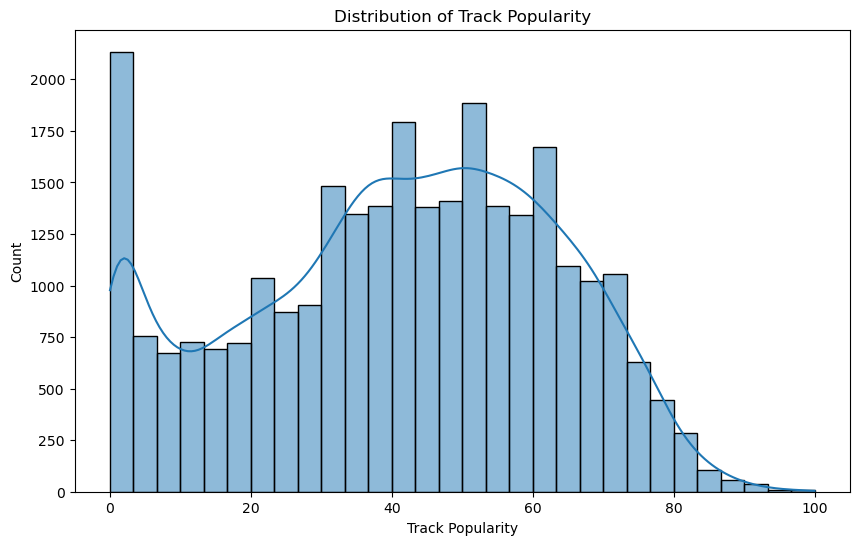

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_0mean["track_popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Count")
plt.show()

Although the proportion of 0 popularity has decreased greatly, there are still a lot remaining. We will therefore still need to account for them in our resulting analysis.

Saving the cleaned dataset with the artist popularity values replacing the 0 values in the popularity column:

In [ ]:
OUTPUT_PATH= "../data/0mean_data.csv"
df_0mean.to_csv(OUTPUT_PATH, index=False)

#### b. Removing the rows with 0 popularity
<a id="subsub2"></a>

In [ ]:
df_no0 = df.copy()
print(df_no0.shape)
df_no0 = df_no0[df_no0['track_popularity'] != 0]

print(df_no0.shape)
print("Total number of songs with 0 popularity:", df.shape[0] - df_no0.shape[0])

(28352, 30)
(25736, 30)
Total number of songs with 0 popularity: 2616


Let's have a look again at the distribution of the target variable, i.e. the popularity of the tracks.

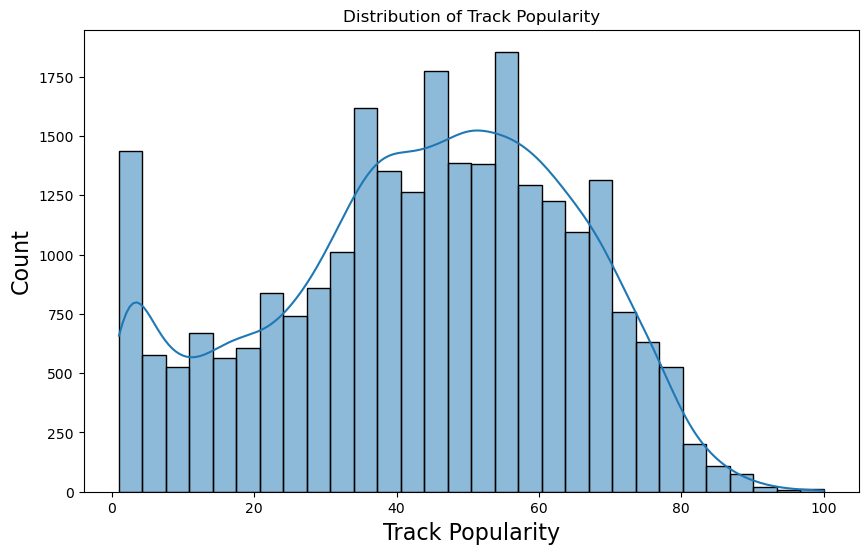

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_no0["track_popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

Now the next bin also has a lot of values, which again is not ideal and we might need to account for that in our results' analysis. When considering this option, we want to keep in mind that the ideal situation would be to have a normal distribution of the track popularity values.

Saving the cleaned dataset with no 0 values in the popularity column:

In [ ]:
OUTPUT_PATH= "../data/no0_data.csv"
df_no0.to_csv(OUTPUT_PATH, index=False)

#### c. Not doing anything
<a id="subsub3"></a>

The third option is the easiest, but it might not be the best option. We will explore the first two options and see which one is the best. In that case, there is no need to save the data into a new csv file as it hasn't been modified.

We will retain all three options for now. In the next stages of our project, we will test our models on each of the these three options to see which works best.

### Distribution of the other variables
<a id="sub4"></a>

We normalized our quantitiative data in during pre-processing, which we can visualize of below.

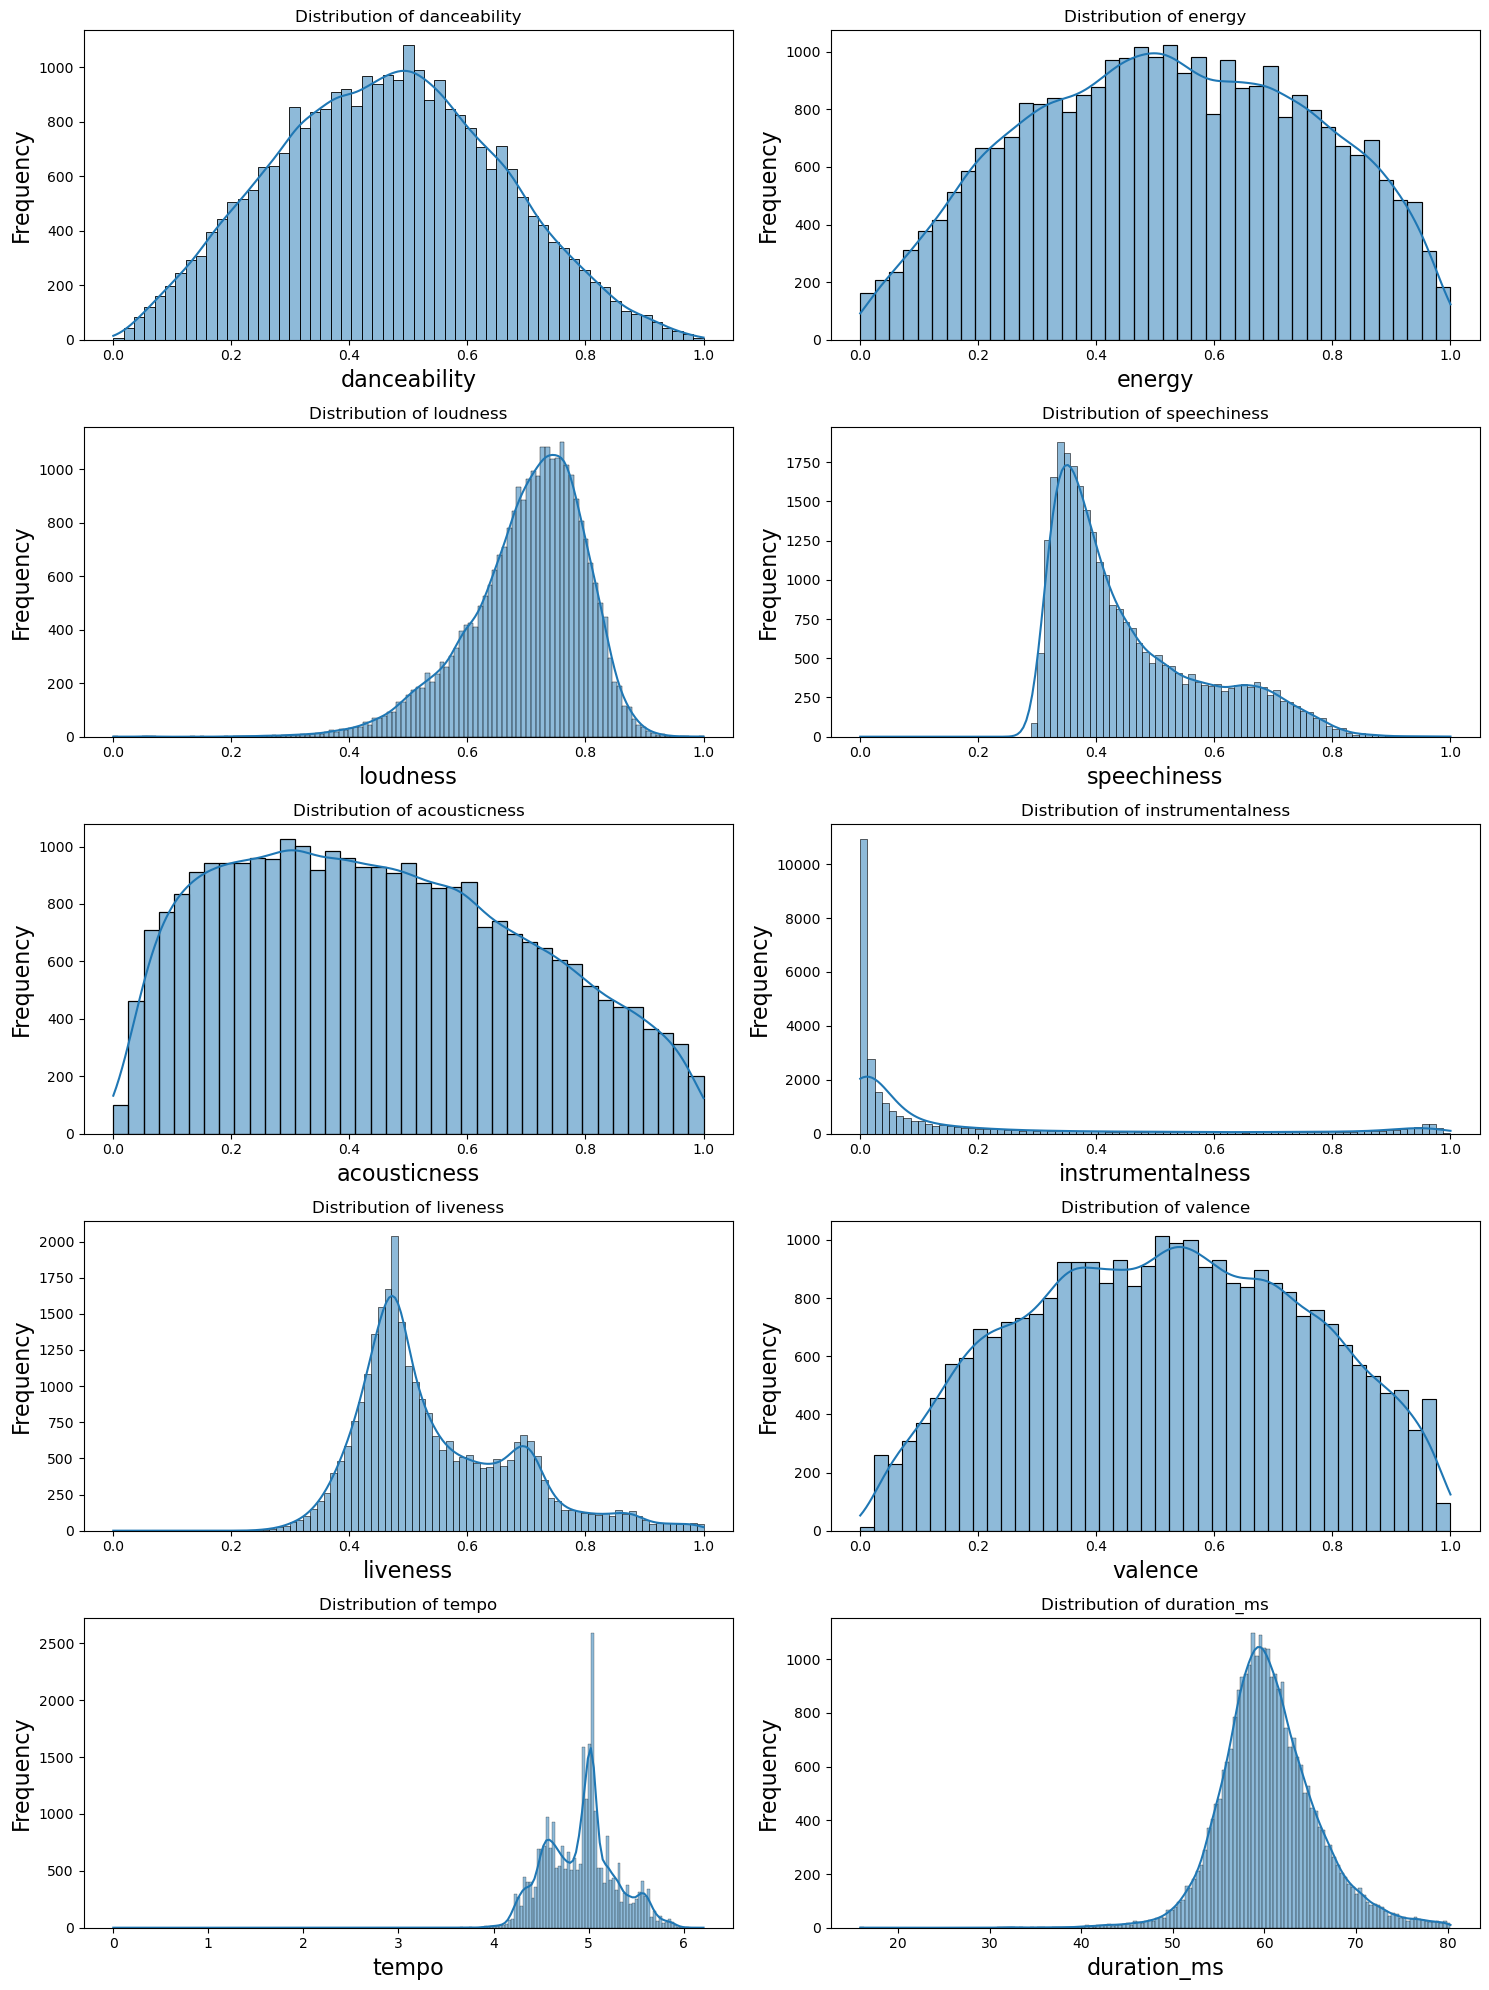

In [ ]:
numeric_columns = ["danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"
]

plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col, fontsize=16)  
    plt.ylabel("Frequency", fontsize=16)  
plt.tight_layout()
plt.show()

Similarly, we can consider the distributions of the categorical column (track genre) to look for any anomalies in the data.

/var/folders/fk/y4nzg4p56g3_1th0bv19rx0r0000gn/T/ipykernel_15340/892870289.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts, x='Genre', y='Count',palette="viridis")


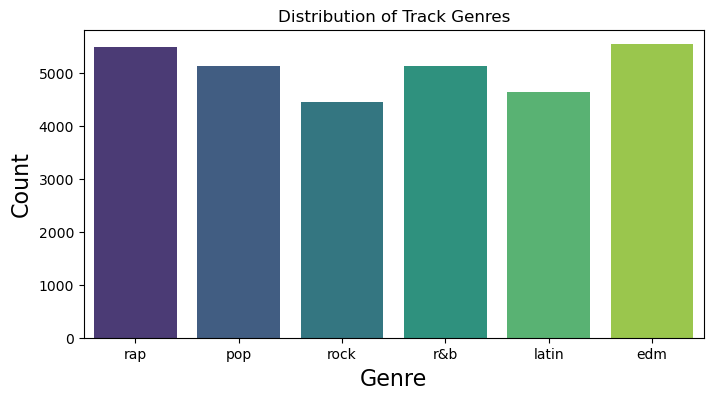

In [ ]:
genre_columns = ["rap", "pop", "rock", "r&b", "latin", "edm"]
genre_data = df[genre_columns]


genre_counts = genre_data.sum().reset_index()
genre_counts.columns = ['Genre', 'Count']  

plt.figure(figsize=(8, 4))
sns.barplot(data=genre_counts, x='Genre', y='Count',palette="viridis")
plt.title("Distribution of Track Genres")
plt.xlabel("Genre", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

There are no outliers for genre track, almost every genre is well-represented among the dataset.

Lastly, we can look at the distributions of the temporal variables.

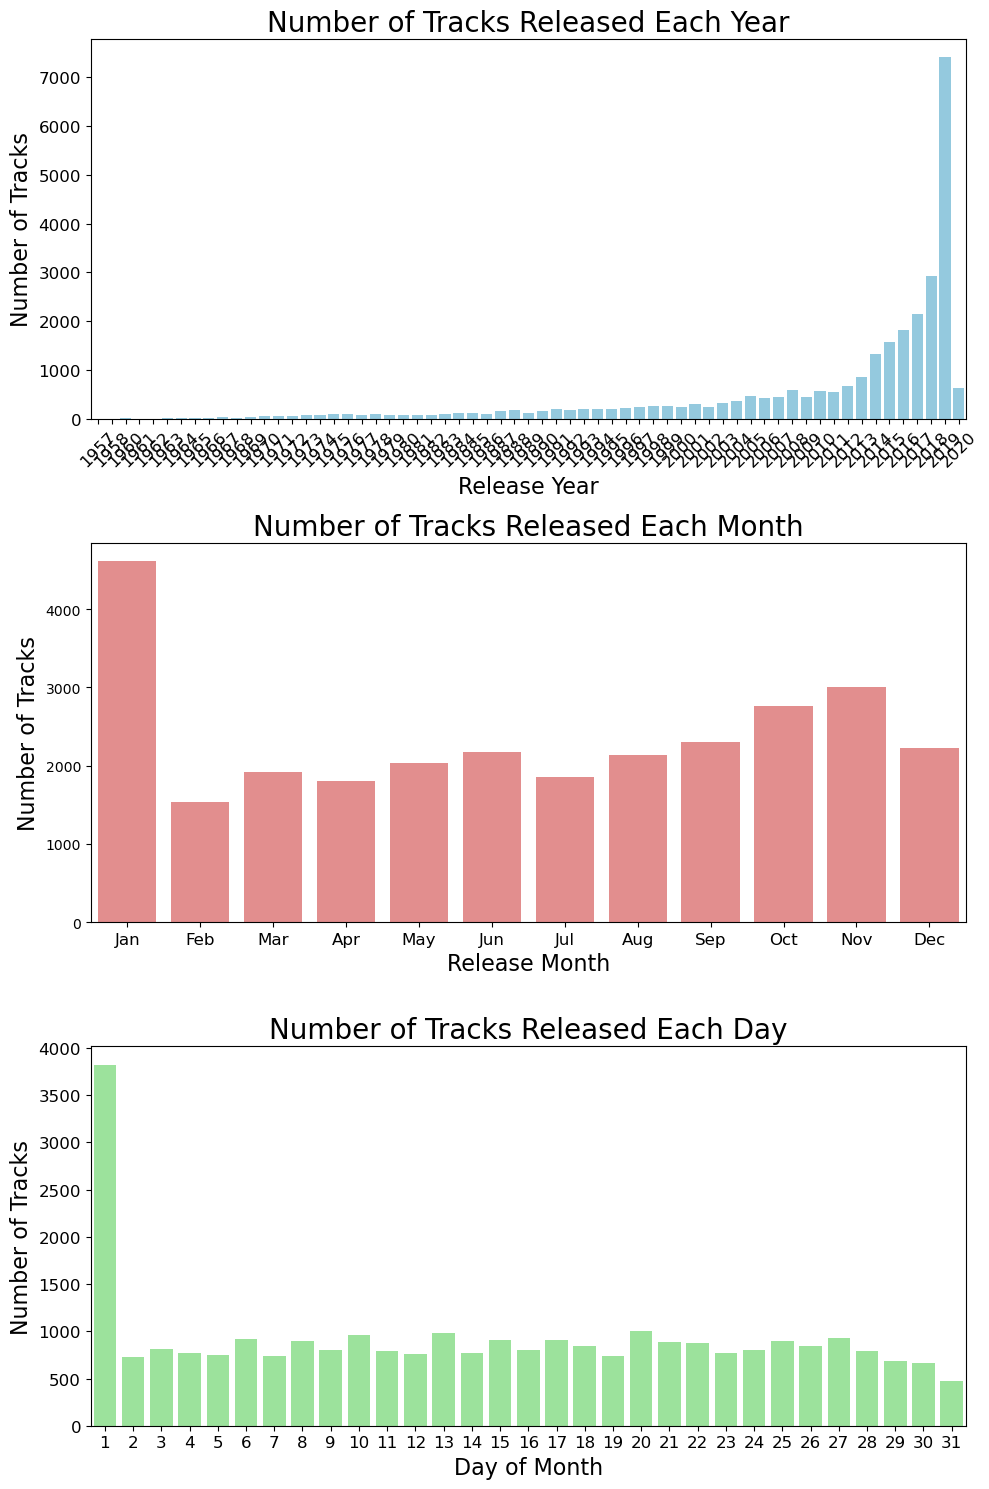

In [ ]:
tracks_per_year = df['release_year'].value_counts().sort_index()
tracks_per_month = df['release_month'].value_counts().sort_index()
tracks_per_day = df['release_day'].value_counts().sort_index()


fig, axs = plt.subplots(3, 1, figsize=(10,15))  

# Year
sns.barplot(x=tracks_per_year.index, y=tracks_per_year.values, color="skyblue", ax=axs[0])
axs[0].set_title("Number of Tracks Released Each Year", fontsize=20)  
axs[0].set_xlabel("Release Year", fontsize=16)  
axs[0].set_ylabel("Number of Tracks", fontsize=16)  
axs[0].tick_params(axis='x', rotation=45, labelsize=12)  
axs[0].tick_params(axis='y', labelsize=12) 


# Month
sns.barplot(x=tracks_per_month.index, y=tracks_per_month.values, color="lightcoral", ax=axs[1])
axs[1].set_title("Number of Tracks Released Each Month", fontsize=20)
axs[1].set_xlabel("Release Month", fontsize=16)
axs[1].set_ylabel("Number of Tracks", fontsize=16)
axs[1].set_xticks(range(12))
axs[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12) 


# Day
sns.barplot(x=tracks_per_day.index, y=tracks_per_day.values, color="lightgreen", ax=axs[2])
axs[2].set_title("Number of Tracks Released Each Day", fontsize=20)
axs[2].set_xlabel("Day of Month", fontsize=16)
axs[2].set_ylabel("Number of Tracks", fontsize=16)
axs[2].tick_params(axis='x', labelsize=12)  
axs[2].tick_params(axis='y', labelsize=12)  

plt.tight_layout()
plt.show()

We can clearly see that the data is imbalanced for release year, but it's actually a good thing to have more data for recent track since they capture the current trend so that we can predict track_popularity for future hits more accurately

### Plotting potential predictors against the target variable
<a id="sub5"></a>

We can visualize the relationships between the quantitative predictors and the target variable through the use of scatterplots.

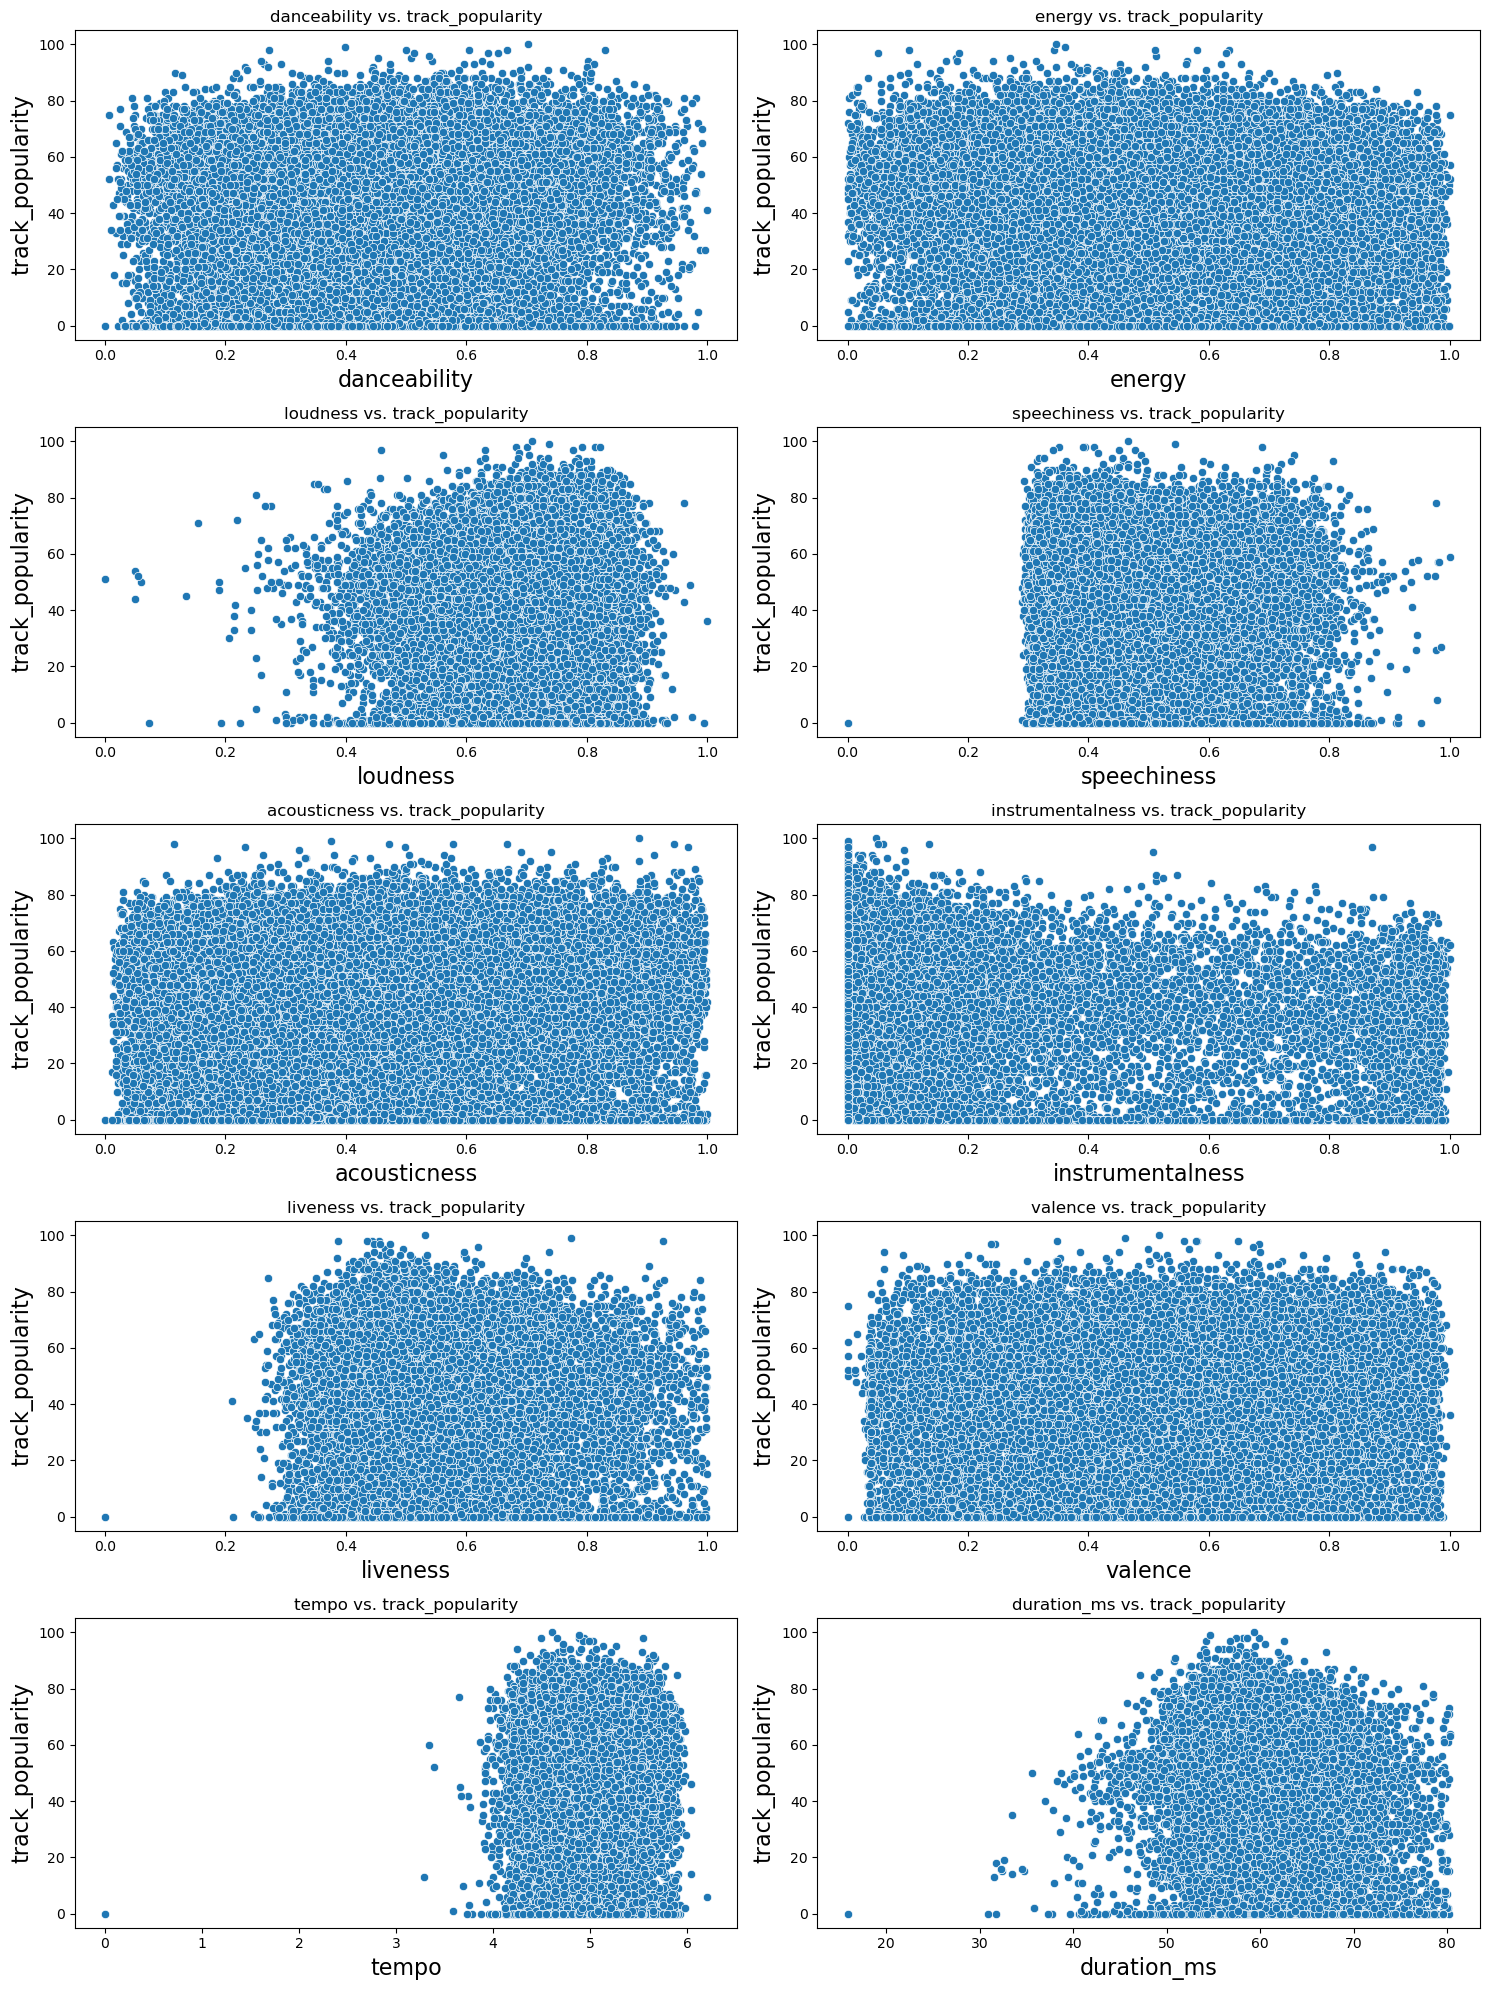

In [ ]:

plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(data=df, x=column, y="track_popularity")
    plt.title(f"{column} vs. track_popularity")
    plt.xlabel(column, fontsize=16)
    plt.ylabel("track_popularity", fontsize=16)

plt.tight_layout()
plt.show()

From these plots, we can see that there is no apparent relationship between quantitative predictors and the target variable. 

We next look at the distributions of the categorical variables, in this case the music genres.

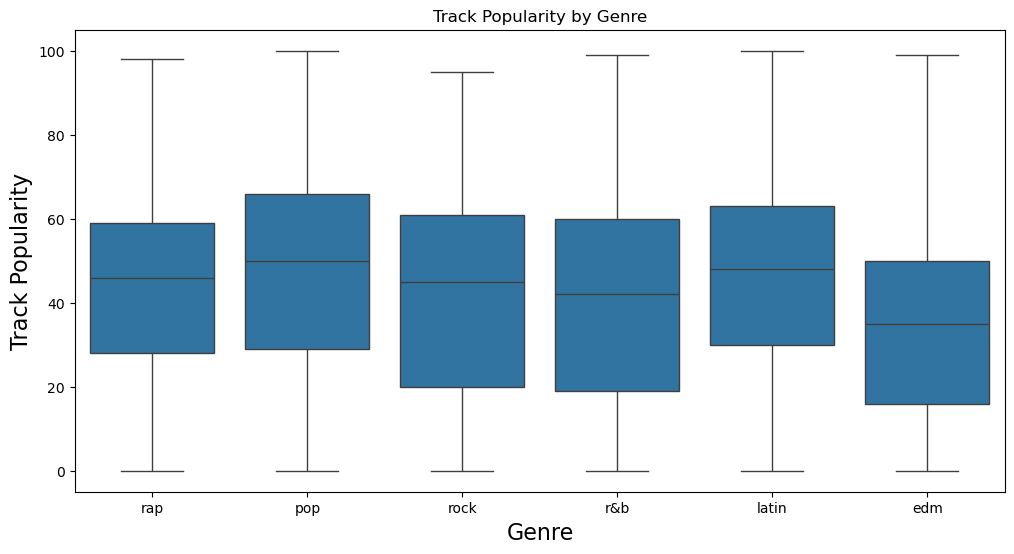

In [ ]:
data_melted = df.melt(id_vars=["track_popularity"], value_vars=genre_columns, 
                        var_name="Genre", value_name="Is_Present")

# Filter to only include rows where the genre is present (Is_Present == 1)
data_genre = data_melted[data_melted["Is_Present"] == 1]

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_genre, x="Genre", y="track_popularity")
plt.title("Track Popularity by Genre")
plt.xlabel("Genre",fontsize=16)
plt.ylabel("Track Popularity", fontsize=16)
plt.show()

Similarly to with the quantitative variables, we find no clear genre that is more popular than others.

#### Temporal Trends

We start by looking at whether song popularity changes over release year. We note that there is a large confidence interval for earlier years due to limited data for this track release period.

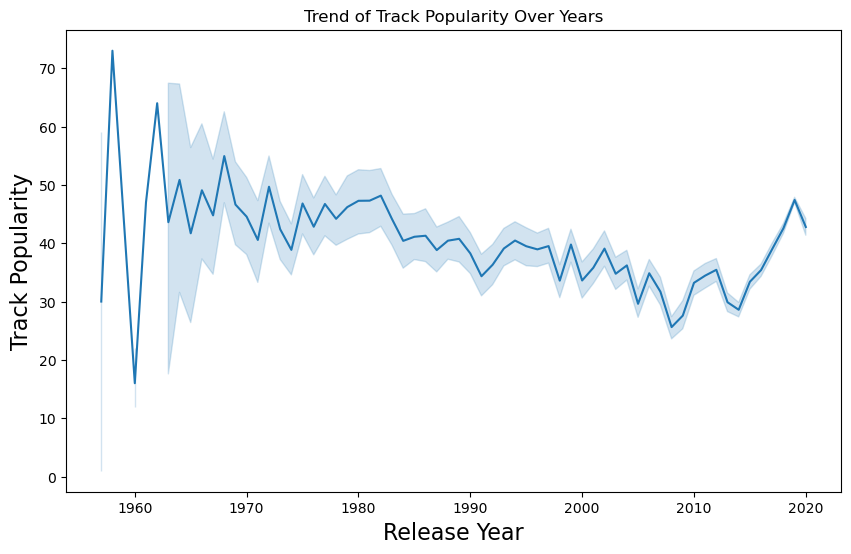

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="release_year", y="track_popularity", errorbar=('ci', 95))
plt.title("Trend of Track Popularity Over Years")
plt.xlabel("Release Year",fontsize=16)
plt.ylabel("Track Popularity",fontsize=16)
plt.show()

Similarly, we can create visualizations to investigate whether there is a relationship between track popularity and month or day of the song's release. Would certain timeframes (eg. Christmas songs or "summer songs") have an impact on popularity?

/var/folders/fk/y4nzg4p56g3_1th0bv19rx0r0000gn/T/ipykernel_15340/887940443.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popularity_by_month, x="release_month", y="track_popularity", palette="magma")


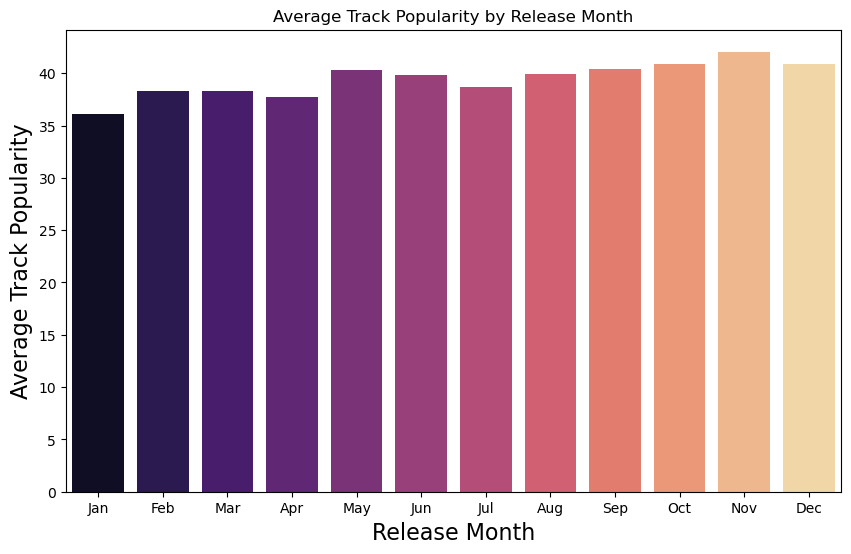

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average track popularity for each month
popularity_by_month = df.groupby('release_month')['track_popularity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=popularity_by_month, x="release_month", y="track_popularity", palette="magma")
plt.title("Average Track Popularity by Release Month")
plt.xlabel("Release Month",fontsize=16)
plt.ylabel("Average Track Popularity",fontsize=16)
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


/var/folders/fk/y4nzg4p56g3_1th0bv19rx0r0000gn/T/ipykernel_15340/1071498040.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popularity_by_day, x="release_day", y="track_popularity", palette="coolwarm")


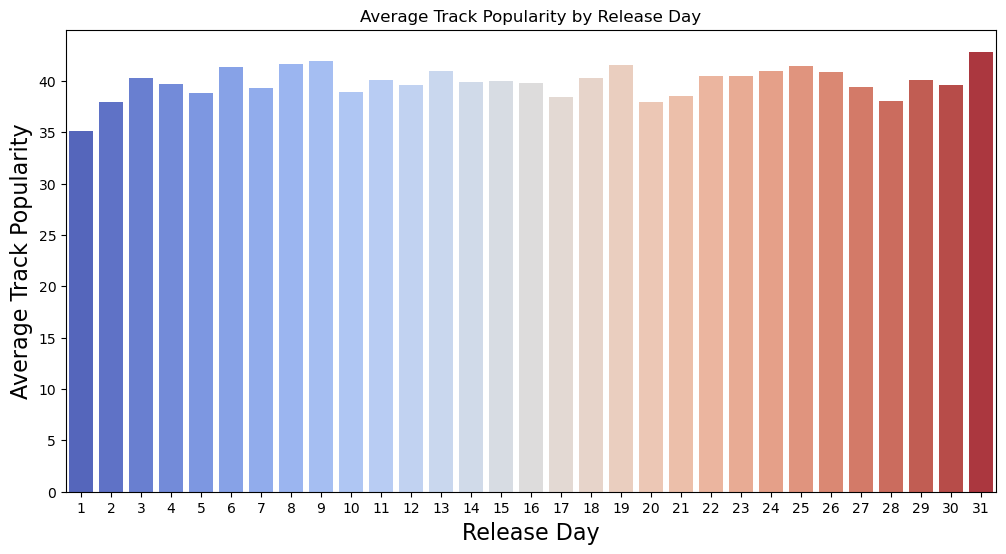

In [ ]:
# Calculate the average track popularity for each day of the month
popularity_by_day = df.groupby('release_day')['track_popularity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=popularity_by_day, x="release_day", y="track_popularity", palette="coolwarm")
plt.title("Average Track Popularity by Release Day")
plt.xlabel("Release Day",fontsize=16)
plt.ylabel("Average Track Popularity",fontsize=16)
plt.xticks(ticks=range(0, 31), labels=range(1, 32))  
plt.show()


We find that there is no clear relationship between any of the temporal aspects investigated above and track popularity.

### Clustering

<a id="sub6"></a>

To determine the optimal number of clusters for our dataset, we utilized the Silhouette Score which evaluates how well each data point fits within its assigned cluster compared to other clusters.

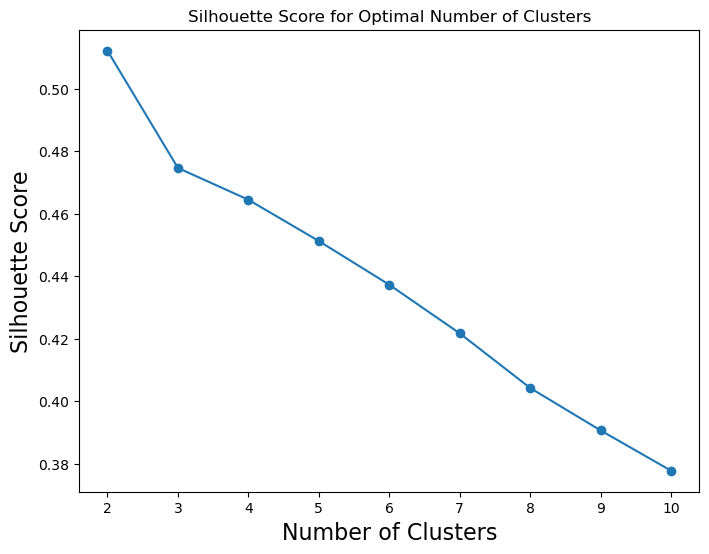

In [ ]:
features_for_clustering = df[numeric_columns].fillna(0)

# Test silhouette scores for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features_for_clustering)
    silhouette_scores.append(silhouette_score(features_for_clustering, labels))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters',fontsize=16)
plt.ylabel('Silhouette Score',fontsize=16)
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()


The best number of clusters is the one that maximize the silhouette score, so here we find the best number **k = 2**.

Simlarly, to find the optimal number of PCA components we utilize the Explained Variance Ratio method. We check the cumulative explained variance to see how much information is retained with each additional component using a 95% threshold. In other words, we will choose the smallest number of components that capture at least 95% of the variance.

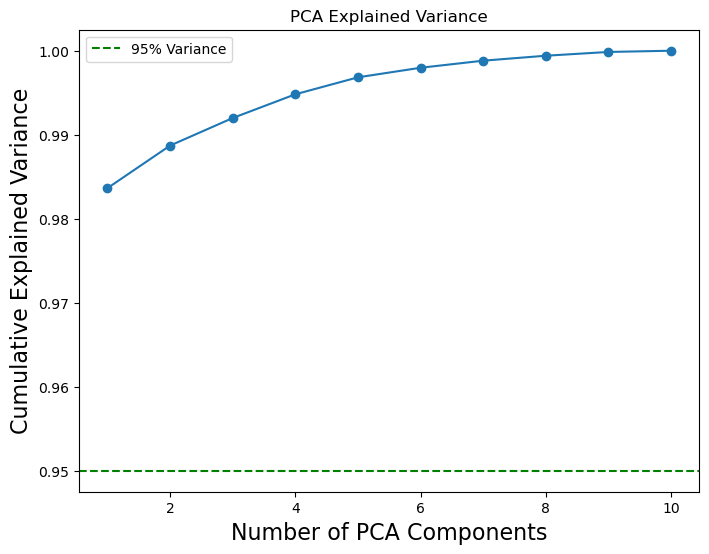

In [ ]:
pca = PCA()
pca.fit(features_for_clustering)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of PCA Components',fontsize=16)
plt.ylabel('Cumulative Explained Variance',fontsize=16)
plt.title('PCA Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

From our analysis, we conclude that the best number of PCA components is 2. 

We now plot our clusters in several ways to gain further insight into our data.

/Users/eliotatlani/opt/anaconda3/envs/hit_predict/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


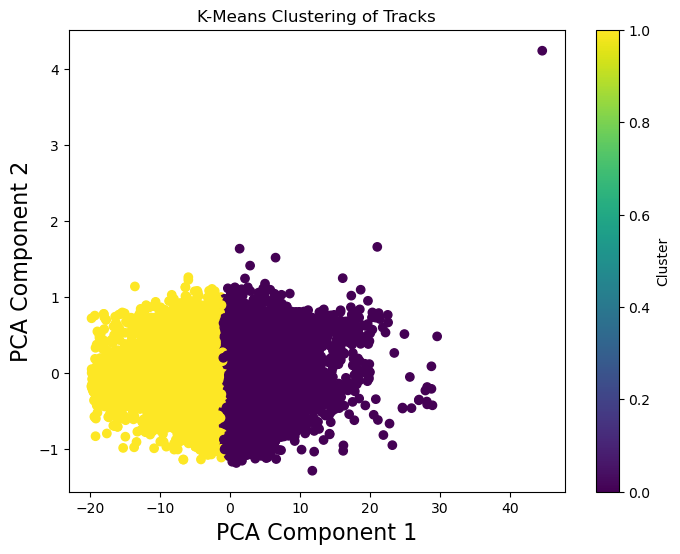

In [ ]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(features_for_clustering)

pca = PCA(n_components=2)
components = pca.fit_transform(features_for_clustering)
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap="viridis")
plt.title("K-Means Clustering of Tracks")
plt.xlabel("PCA Component 1",fontsize=16)
plt.ylabel("PCA Component 2",fontsize=16)
plt.colorbar(label="Cluster")
plt.show()

/Users/eliotatlani/opt/anaconda3/envs/hit_predict/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


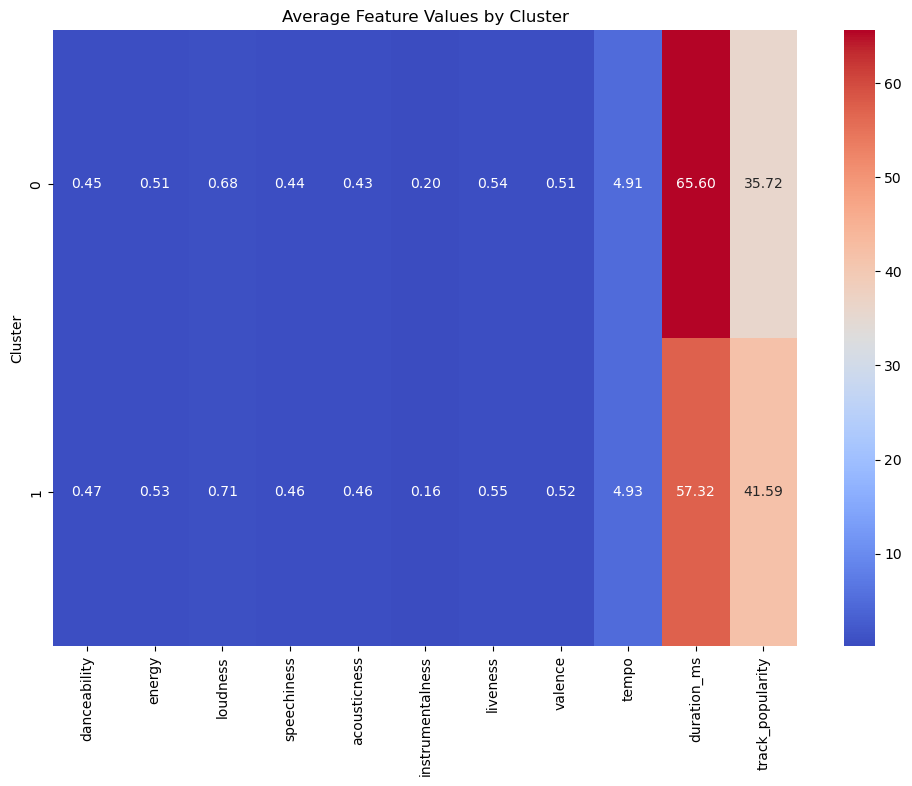

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numeric_columns])

# Calculate mean values for each feature within each cluster
cluster_profile = df.groupby('Cluster')[numeric_columns + ['track_popularity']].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Average Feature Values by Cluster")
plt.show()

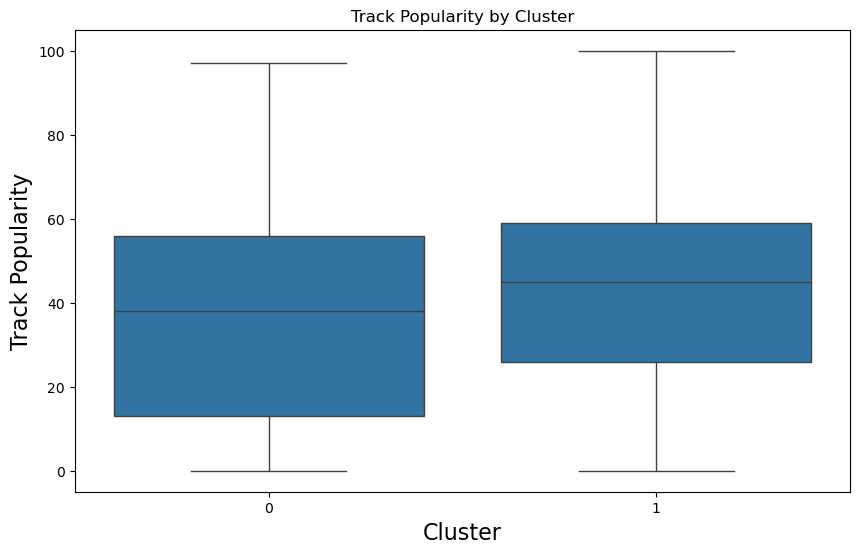

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='track_popularity')
plt.title("Track Popularity by Cluster")
plt.xlabel("Cluster",fontsize=16)
plt.ylabel("Track Popularity",fontsize=16)
plt.show()

### Outliers
<a id="sub7"></a>

We are going to identify any outliers by looking at the number of outliers based on Z-scores, finding those that are more than 3 standard deviations away from the mean. We are going to do this analysis on numeric data since Z-scores can only be calculated for numeric data, and categorical variables do not support the concepts of outliers in the same way that numeric data does as they do not deviate from a distribution.

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
outliers = numeric_df[(np.abs(zscore(numeric_df)) > 3).any(axis=1)]
print("Number of outliers:", len(outliers))

Number of outliers: 1617


In [ ]:
outlier_counts = (np.abs(zscore(numeric_df)) > 3).sum().astype(int)
print("Outliers per predictor:")
print(outlier_counts)

Outliers per predictor:
track_popularity            0
danceability                0
energy                      0
key                         0
loudness                  238
mode                        0
speechiness                94
acousticness                0
instrumentalness            0
liveness                  261
valence                     0
tempo                      18
duration_ms               368
edm                         0
r&b                         0
rap                         0
latin                       0
rock                        0
pop                         0
artist_track_encoded        1
playlist_id_encoded         0
track_album_id_encoded      0
release_year              748
release_month               0
release_day                 0
Cluster                     0
dtype: int64


We can see from the above that the predictors with outliers are `loudness`, `speechiness`, `liveness`, `tempo`, `duration_ms` and `artist_track_encoded`.

In [ ]:
genres = ['rap', 'rock', 'edm', 'r&b', 'pop', 'latin']

outliers_by_genre = {genre: outliers[outliers[genre] == 1].shape[0] for genre in genres}
print(outliers_by_genre)

{'rap': 253, 'rock': 817, 'edm': 191, 'r&b': 215, 'pop': 79, 'latin': 103}


The outliers seem to be well-distributed across genres - there is not one genres with more outliers than the others.

We can plot the distributions of these predictors below to better understand the spread of the outliers, as well as a correlation matrix to see if any combination of these predictors are causing outliers.

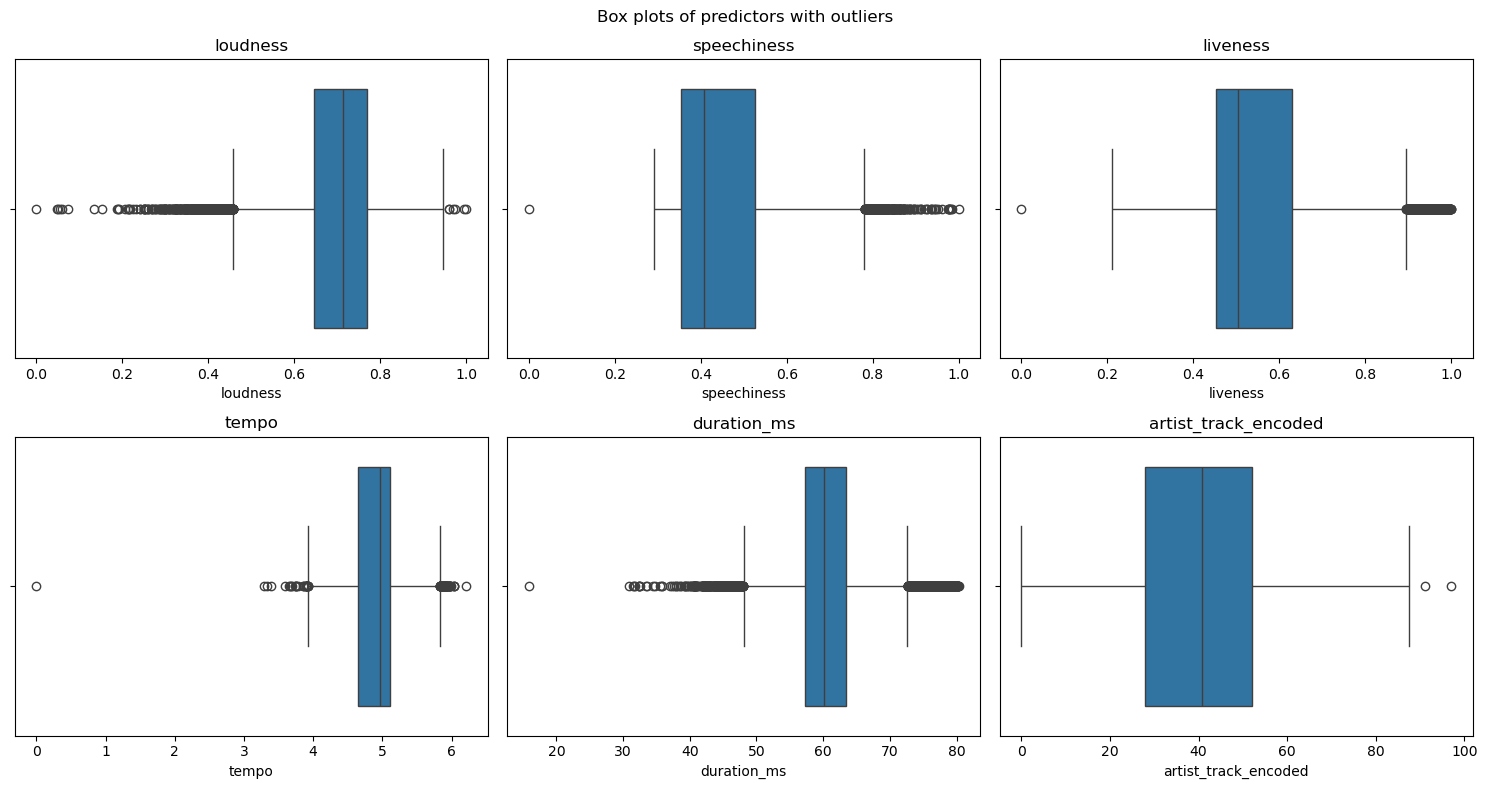

In [ ]:
outlier_predictors = ["loudness", "speechiness", "liveness", "tempo", "duration_ms", "artist_track_encoded"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Box plots of predictors with outliers")

for i, predictor in enumerate(outlier_predictors):
    row, col = divmod(i, 3)
    sns.boxplot(x=df[predictor], ax=axes[row, col])
    axes[row, col].set_title(f"{predictor}")

plt.tight_layout()
plt.show()

From the box plots above, we can see that there is an outlier where `tempo`=0. We decide to remove this point since it is not really possible to have a song without a tempo. Upon taking a closer look at this point, we can see that this track is also the extreme outlier visible for `speechiness`, `liveness` and `duration_ms`.

In [ ]:
df[df['tempo'] == 0].loc[:, outlier_predictors]

,loudness,speechiness,liveness,tempo,duration_ms,artist_track_encoded
18261,0.191869,0.0,0.0,0.0,15.874011,0.0


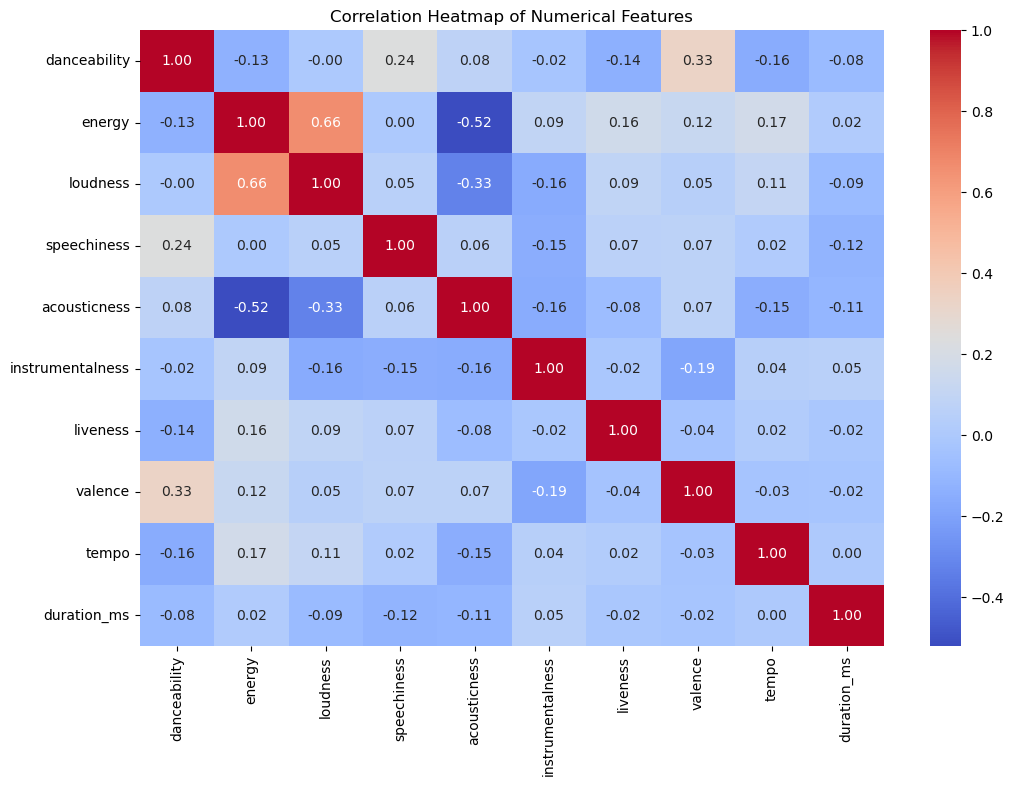

In [ ]:
# removing this datapoint
df = df[df['tempo'] != 0]
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

The extreme outlier has now been removed, which we can see in the boxplots below:

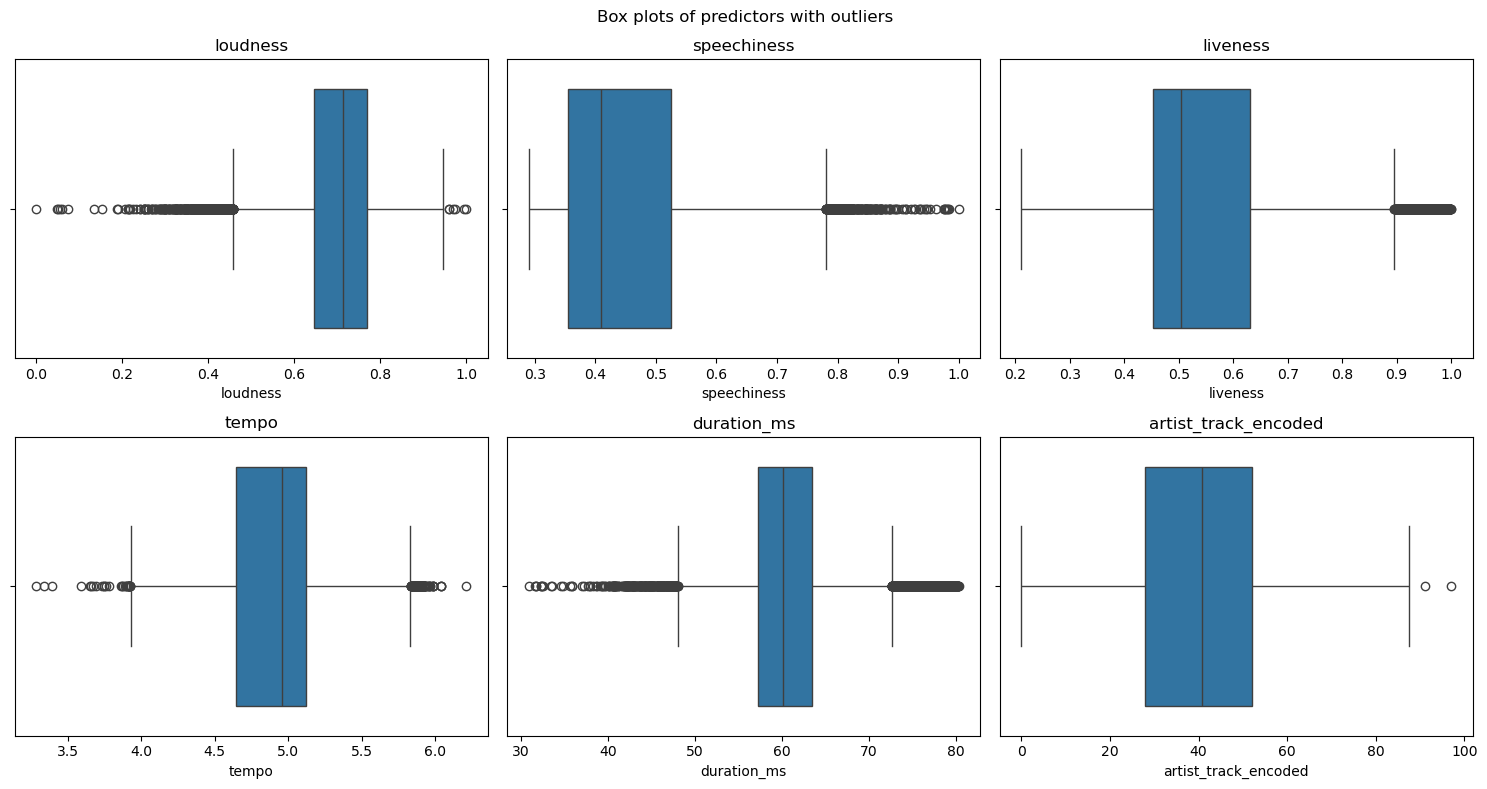

In [ ]:
outlier_predictors = ["loudness", "speechiness", "liveness", "tempo", "duration_ms", "artist_track_encoded"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Box plots of predictors with outliers")

for i, predictor in enumerate(outlier_predictors):
    row, col = divmod(i, 3)
    sns.boxplot(x=df[predictor], ax=axes[row, col])
    axes[row, col].set_title(f"{predictor}")

plt.tight_layout()
plt.show()

We decide not to remove the outlier for `artist_track_encoded` since it is not too far from the rest of the distribution.

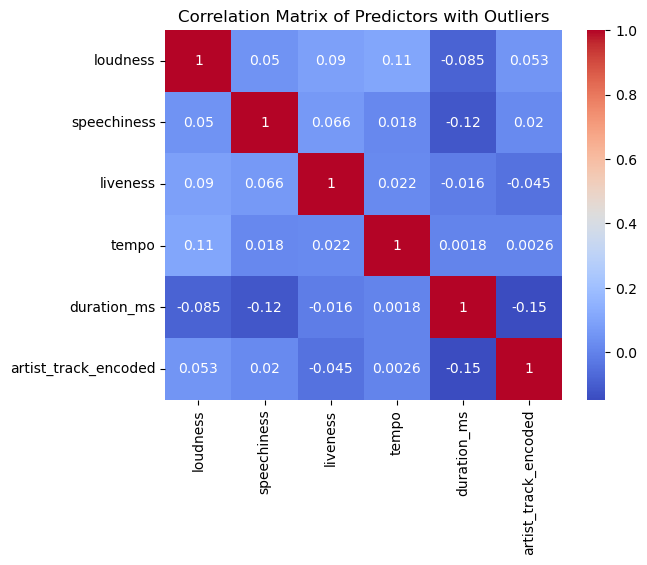

In [ ]:
corr_matrix = df[outlier_predictors].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Predictors with Outliers")
plt.show()

There are not any notable combinations of predictors with outliers to take note of here.

From our knowledge about music more generally, it is not surprising that there are some outliers and variation in the music itself as some artists tend to experiment occasionally with unusual styles or characteristics. Specifically for `duration_ms`, it is not uncommon to see songs that are especially long or short. 

Since music inherently has a lot of variation, it may therefore be best in this case to keep the majority of these outliers. These outliers may represent distinct styles of music, and for our case of predictions, keeping outliers might make the model more adaptable to different music styles. 

Other than the point removed above, we decide to keep all other outliers.

### Leverage and influential point analysis

We can fit a simple preliminary regression model to identify any leverage and influential points in the data utilising the numeric values that characterise the tracks. We therefore choose to exclude `release_year`, `release_month` and `release_day` for the time being.

In [ ]:
numeric_predictors = df.select_dtypes(include=[np.number]).columns.drop(['track_popularity', 'release_year', 'release_month', 'release_day'])

X = df[numeric_predictors]
y = df['track_popularity']

lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_pred = lin_reg.predict(X)

In [ ]:
import statsmodels.api as sm


X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

influence = model_sm.get_influence()

# calculate leverage and Cook's Distance
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

# define thresholds and find influential points
leverage_threshold = 2 * (len(numeric_predictors) + 1) / len(df)
cooks_threshold = 4 / len(df)

# create a df to store leverage and Cook's Distance for each observation
influential_df = pd.DataFrame({
    'Leverage': leverage,
    'Cook\'s Distance': cooks_d
}, index=df.index)

influential_df['High Leverage'] = influential_df['Leverage'] > leverage_threshold
influential_df['High Cook\'s Distance'] = influential_df['Cook\'s Distance'] > cooks_threshold
influential_points = influential_df[(influential_df['High Leverage']) | 
                                    (influential_df['High Cook\'s Distance'])]

num_high_leverage = influential_df['High Leverage'].sum()
num_high_cooks_distance = influential_df['High Cook\'s Distance'].sum()
num_both = ((influential_df['High Leverage']) & (influential_df['High Cook\'s Distance'])).sum()

print(f"Number of high leverage points: {num_high_leverage}")
print(f"Number of high Cook's Distance points: {num_high_cooks_distance}")
print(f"Number of points with both high leverage and high Cook's Distance: {num_both}")

Number of high leverage points: 477
Number of high Cook's Distance points: 1798
Number of points with both high leverage and high Cook's Distance: 86


Given the high number of high leverage and influential points that we found above, combined with the inherent variation in music data, it makes sense in this case to keep these points. Capturing all variations gives us a more complete picture of music trends even for more uncommon tracks which could help with prediction down the line. Given the large number of them, it seems that they capture the diversity of music data as opposed to errors or mistakes. 

Therefore, we keep these points, but can always refer back to this analysis down the line if we do want to look further into the impact of these points on the model we create.

## Baseline Models
<a id="baseline-model"></a>

Let's start by splitting our data into a train and test datasets. We'll use them to test our baseline LinearRegression and KNN model performances.

In [ ]:
df.head()

X = df.drop(columns=['track_popularity', 'track_artist', 'track_album_id', 'track_album_release_date', 'playlist_id','playlist_subgenre'])
Y = df['track_popularity']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22680, 25), (5671, 25), (22680,), (5671,))

In [ ]:
def get_metrics(model, name: str, data: tuple) -> dict:
    x_train, x_test, y_train, y_test = data
    d = {}
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    d['name'] = name
    d['train_mse'] = mean_squared_error(y_train, y_hat_train)
    d['test_mse'] = mean_squared_error(y_test, y_hat_test)
    d['r2_train'] = r2_score(y_train, y_hat_train)
    d['r2_test'] = r2_score(y_test, y_hat_test)
    return d

data = (x_train, x_test, y_train, y_test)

### Linear Regression
<a id="sub8"></a>

In [ ]:
lin_reg = LinearRegression().fit(x_train,y_train)
results = [get_metrics(lin_reg, 'Linear Regression', data)]

### kNN Regression
<a id="sub9"></a>

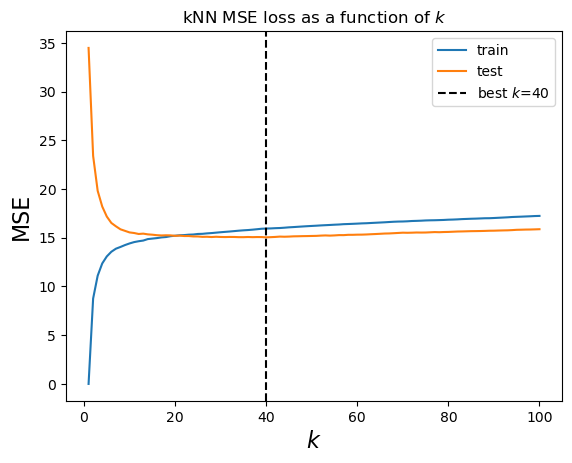

In [ ]:



ks = range(1, 101)

train_mses = []
test_mses = []

for k in ks:
    cur_knn = KNeighborsRegressor(n_neighbors=k).fit(x_train, y_train)
    train_mses.append(mean_squared_error(y_train, cur_knn.predict(x_train)))
    test_mses.append(mean_squared_error(y_test, cur_knn.predict(x_test)))
    
best_idx = np.argmin(test_mses)
best_k = ks[best_idx]

plt.plot(ks, train_mses, label='train')
plt.plot(ks, test_mses, label='test')
plt.axvline(best_k, c='k', ls='--', label=rf'best $k$={best_k}')
plt.xlabel(r'$k$',fontsize=16)
plt.ylabel('MSE',fontsize=16)
plt.title('kNN MSE loss as a function of $k$')
plt.legend();

In [ ]:
best_knn = KNeighborsRegressor(n_neighbors=best_k).fit(x_train, y_train)
results.append(get_metrics(best_knn, f'kNN (k={best_k})', data))

In [ ]:
pd.DataFrame(results)

,name,train_mse,test_mse,r2_train,r2_test
0,Linear Regression,13.442674,11.933988,0.976026,0.978884
1,kNN (k=40),15.945658,15.041498,0.971562,0.973386
